In [1]:
import json
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from openff.toolkit import Molecule

In [2]:
with open("database.json", 'r') as infile:
    db = json.load(infile)

In [3]:
db

{'mobley_1743409': {'d_charging': 0.042,
  'expt_reference': '10.1139/v91-2',
  'nickname': ' diethyl butanedioate',
  'expt_s (cal/K.mol)': 'Not available',
  'expt_h': 'Not available',
  'h_conf': 0.7387974134984716,
  'd_h_solv': 0.7005066537227272,
  'smiles': 'CCOC(=O)CCC(=O)OCC',
  'calc_h': -24.34251784532171,
  'd_expt_s (cal/K.mol)': 'Not available',
  'd_expt_h': 'Not available',
  'd_calc': 0.053,
  'iupac': 'diethyl butanedioate',
  'calc_charging': -10.397,
  'd_calc_h': 0.697757686308288,
  'd_h_conf': 0.06578621300971196,
  'd_vdw': 0.032,
  'd_expt': 0.6,
  'h_solv': -25.087679110094975,
  'd_calc_s (cal/mol.K)': 2.347032258029306,
  'expt': -5.71,
  'calc_vdw': 1.713,
  'expt_h_reference': 'Not available',
  'calc_reference': '10.1021/acs.jced.7b00104',
  'groups': ['carboxylic acid ester'],
  'calc': -8.683,
  'PubChemID': 31249,
  'notes': ['Experimental uncertainty not presently available, so assigned a default value.'],
  'calc_s (cal/mol.K)': -52.52228021238206},


In [4]:
for k,v in db.items():
    print(k, v['smiles'])

mobley_1743409 CCOC(=O)CCC(=O)OCC
mobley_9979854 C[C@H](C(F)(F)F)O
mobley_1873346 Cc1ccccc1
mobley_4715906 C[C@@H]1CCCC[C@@H]1C
mobley_3169935 c1ccc(c(c1)N)Cl
mobley_9729792 C1C=CC=CC=C1
mobley_6358463 c1ccc(c(c1)C(F)(F)F)C(F)(F)F
mobley_2845466 c1c2c(cc(c1Cl)Cl)Oc3cc(c(cc3O2)Cl)Cl
mobley_6006813 CCCC[N+](=O)[O-]
mobley_5445548 CC(C)c1ccccc1
mobley_3802803 CCCCCCO[N+](=O)[O-]
mobley_9028462 COC(=O)C(F)(F)F
mobley_4305650 CCC#N
mobley_1838110 C(C(F)(Cl)Cl)(F)(F)Cl
mobley_1770205 COP(=S)(OC)SCn1c(=O)c2ccccc2nn1
mobley_5393242 CCOP(=S)(OCC)Oc1cc(nc(n1)C(C)C)C
mobley_1722522 CCCC(=O)OCC
mobley_7610437 CC[C@H](C(C)C)O
mobley_1893937 CCCCCCCl
mobley_9209581 CN(C)C
mobley_6266306 C1CNC1
mobley_667278 c1cc(c(c(c1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl)Cl
mobley_8311303 c1cc(c(cc1c2c(c(cc(c2Cl)Cl)Cl)Cl)Cl)Cl
mobley_352111 CC(=O)OCCOC(=O)C
mobley_967099 CC(C)[N+](=O)[O-]
mobley_2693089 CC(C)Cc1cnccn1
mobley_4964807 CC(=O)CO[N+](=O)[O-]
mobley_4188615 CN(C)C(=O)c1ccccc1
mobley_9565165 c1ccc-2c(c1)Cc3c2cccc3

In [5]:
mols = []
for ligname in db.keys():
    mols.append(Chem.AddHs(Chem.MolFromSmiles(f"{db[ligname]['smiles']} {ligname}")))

In [6]:
len(mols)

642

In [7]:
br_mols = []
for m in mols: 
    for a in m.GetAtoms():
        if a.GetAtomicNum() == 35:
            br_mols.append(m)
            break
            

In [8]:
print(len(br_mols))

25


In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.hist(dgrange)
plt.ylabel('Counts')
plt.xlabel('∆G expt (kcal/mol)')

NameError: name 'dgrange' is not defined

In [11]:
mol_by_dg = {
    (-19, -15): [],
    (-15, -10): [],
    (-10, -5): [],
    (-5, 0): [],
    (0, 2): []
}

In [12]:
for mol in br_mols:
    for min_dg, max_dg in mol_by_dg.keys():
        name = mol.GetProp('_Name')
        dg = float(db[name]['expt'])
        print(dg)
        
        if dg >= min_dg and dg < max_dg:
            mol_by_dg[(min_dg, max_dg)].append(mol)
            break

-2.13
-2.13
-2.13
-2.13
-1.95
-1.95
-1.95
-1.95
-0.11
-0.11
-0.11
-0.11
-0.74
-0.74
-0.74
-0.74
-0.1
-0.1
-0.1
-0.1
-0.03
-0.03
-0.03
-0.03
0.18
0.18
0.18
0.18
0.18
-9.73
-9.73
-9.73
-2.3
-2.3
-2.3
-2.3
0.52
0.52
0.52
0.52
0.52
1.79
1.79
1.79
1.79
1.79
-0.48
-0.48
-0.48
-0.48
0.5
0.5
0.5
0.5
0.5
-2.38
-2.38
-2.38
-2.38
-5.85
-5.85
-5.85
-2.33
-2.33
-2.33
-2.33
-1.39
-1.39
-1.39
-1.39
-18.17
0.34
0.34
0.34
0.34
0.34
-1.96
-1.96
-1.96
-1.96
-1.46
-1.46
-1.46
-1.46
-0.4
-0.4
-0.4
-0.4
-0.82
-0.82
-0.82
-0.82
-0.56
-0.56
-0.56
-0.56
0.84
0.84
0.84
0.84
0.84


In [13]:
print(mol_by_dg)

{(-19, -15): [<rdkit.Chem.rdchem.Mol object at 0x17eaa3dd0>], (-15, -10): [], (-10, -5): [<rdkit.Chem.rdchem.Mol object at 0x17ea9d900>, <rdkit.Chem.rdchem.Mol object at 0x17eaa2200>], (-5, 0): [<rdkit.Chem.rdchem.Mol object at 0x17ea98430>, <rdkit.Chem.rdchem.Mol object at 0x17ea987b0>, <rdkit.Chem.rdchem.Mol object at 0x17ea9a120>, <rdkit.Chem.rdchem.Mol object at 0x17ea9a350>, <rdkit.Chem.rdchem.Mol object at 0x17ea9c2e0>, <rdkit.Chem.rdchem.Mol object at 0x17ea9c900>, <rdkit.Chem.rdchem.Mol object at 0x17ea9eba0>, <rdkit.Chem.rdchem.Mol object at 0x17ea9f6d0>, <rdkit.Chem.rdchem.Mol object at 0x17eaa2040>, <rdkit.Chem.rdchem.Mol object at 0x17eaa2cf0>, <rdkit.Chem.rdchem.Mol object at 0x17eaa3350>, <rdkit.Chem.rdchem.Mol object at 0x17eaa5350>, <rdkit.Chem.rdchem.Mol object at 0x17eaa5c10>, <rdkit.Chem.rdchem.Mol object at 0x17eaa7430>, <rdkit.Chem.rdchem.Mol object at 0x17eaa87b0>, <rdkit.Chem.rdchem.Mol object at 0x17eaa8890>], (0, 2): [<rdkit.Chem.rdchem.Mol object at 0x17ea9d27

In [37]:
br_mols_oe = []
for m in mol_by_dg[(-10, -5)]:
    br_mols_oe.append(Molecule.from_rdkit(m, allow_undefined_stereo=True).to_openeye())

In [38]:
from openeye.oechem import *
from openeye.oegraphsim import *
import numpy as np
import random

In [39]:
rand = random.randint(0,len(br_mols_oe))
greedy_chosen_mols = [br_mols_oe[rand]]

overall_tanimoto = np.zeros(len(br_mols_oe))


i = 0
                            
while len(greedy_chosen_mols) < 3:
    chosen_mol = greedy_chosen_mols[i]
    
    tanimotos = []
    for mol in br_mols_oe:

        fp1 = OEFingerPrint()
        OEMakeFP(fp1, chosen_mol, OEFPType_MACCS166)
        fp2 = OEFingerPrint()
        OEMakeFP(fp2, mol, OEFPType_MACCS166)

        # Calculate the Tanimoto score
        tanimoto_score = OETanimoto(fp1, fp2)
        tanimotos.append(tanimoto_score)
    overall_tanimoto += np.array(tanimotos)
    
    
    next_mol_idx = np.argmin(overall_tanimoto)
    
    
    greedy_chosen_mols.append(br_mols_oe[next_mol_idx])
    i += 1
    
        
            
    
    

In [41]:
print(greedy_chosen_mols)

[<openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x17fe5cdb0> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x17fe62d20> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x17fe62d20> >]


In [42]:
greedy_chosen_mols_rd = []
for oem in greedy_chosen_mols:
    greedy_chosen_mols_rd.append(Molecule.from_openeye(oem, allow_undefined_stereo=True).to_rdkit())
    

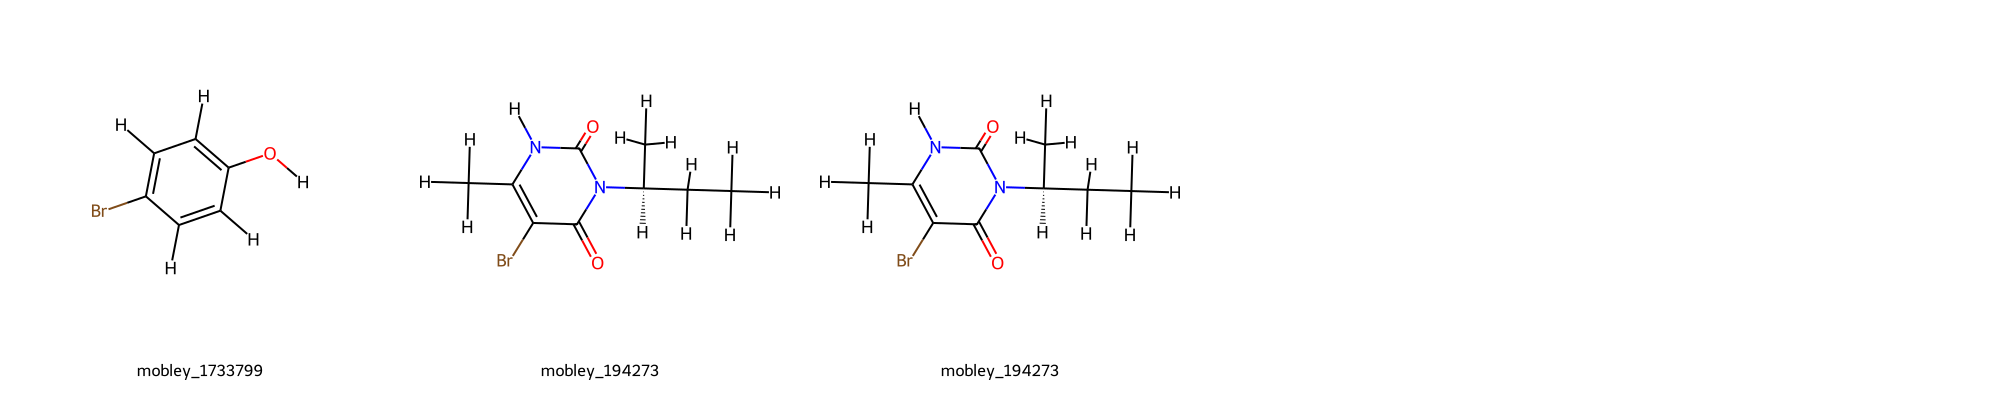

In [43]:
Draw.MolsToGridImage(greedy_chosen_mols_rd, legends=[m.GetProp("_Name") for m in greedy_chosen_mols_rd], molsPerRow=5, subImgSize=(400, 400))

In [44]:
for i in greedy_chosen_mols_rd:
    print(i.GetProp('_Name'))

mobley_1733799
mobley_194273
mobley_194273


In [45]:
mols = [m for m in '''mobley_4039055
mobley_194273
mobley_1733799
mobley_7768165
mobley_7150646
mobley_3738859
mobley_8983100
mobley_9015240
mobley_7769613
mobley_7732703'''.split('\n')]

In [46]:
print(mols)

['mobley_4039055', 'mobley_194273', 'mobley_1733799', 'mobley_7768165', 'mobley_7150646', 'mobley_3738859', 'mobley_8983100', 'mobley_9015240', 'mobley_7769613', 'mobley_7732703']


In [52]:
chosen = []
expt = []
for m in br_mols:
    if m.GetProp('_Name') in mols:
        chosen.append(m)
        expt.append(db[m.GetProp("_Name")]["expt"])
        
order = np.argsort(np.array(expt))
        
chosen = np.array(chosen)[order]

chosen = list(chosen)

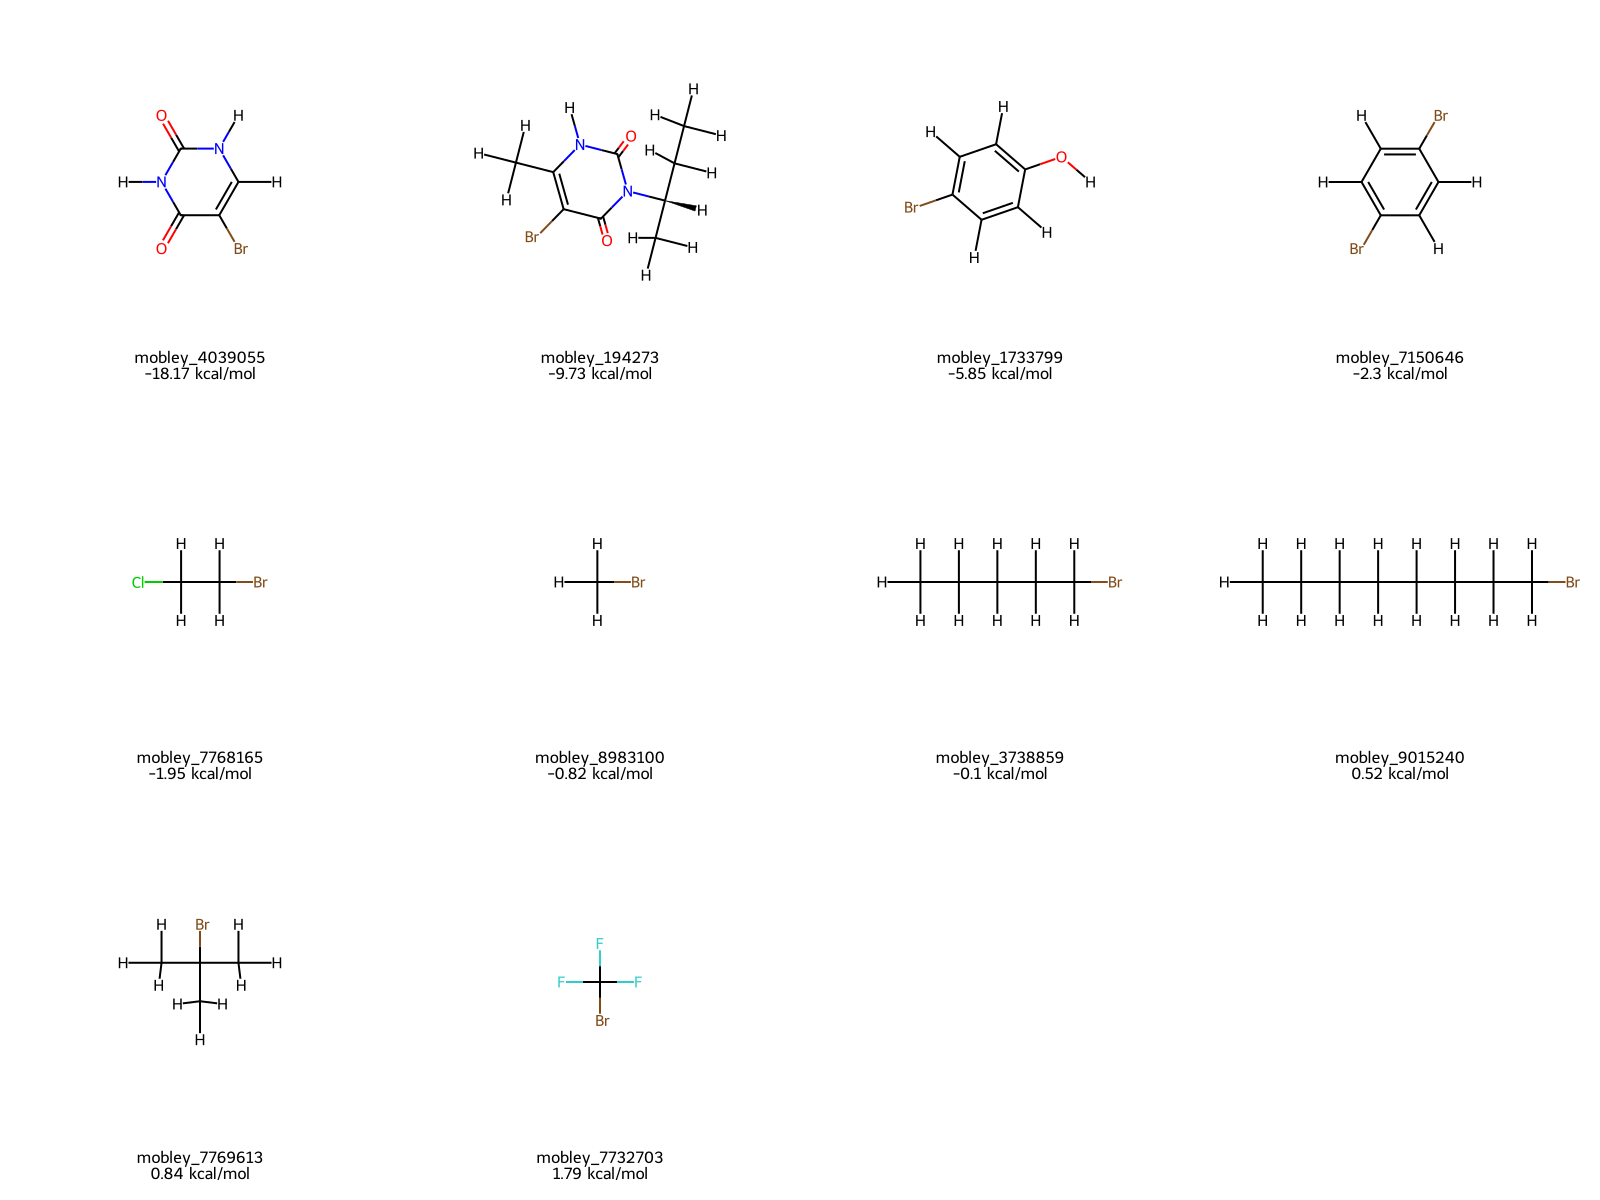

In [53]:
Draw.MolsToGridImage(chosen, legends=[f'{m.GetProp("_Name")}\n{db[m.GetProp("_Name")]["expt"]} kcal/mol' for m in chosen], molsPerRow=4, subImgSize=(400, 400))